# Features visualization with TSNE

---

### 1) Setup

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE as skTSNE
from openTSNE.sklearn import TSNE as openTSNE

In [2]:
SEED = 42

ARTIGO_TRAIN_CLINICAL_FILENAME = "datasets/artigo/train_set_clinical.csv"
ARTIGO_TEST_CLINICAL_FILENAME = "datasets/artigo/test_set_clinical.csv"

ARTIGOV2_TRAIN_CLINICAL_FILENAME = "datasets/artigo_v2/train_set_clinical.csv"
ARTIGOV2_TEST_CLINICAL_FILENAME = "datasets/artigo_v2/test_set_clinical.csv"

NORMALIZADO_TRAIN_CLINICAL_FILENAME = "datasets/normalizado/train_set_clinical.csv"
NORMALIZADO_TEST_CLINICAL_FILENAME = "datasets/normalizado/test_set_clinical.csv"

NORMALIZADOV2_TRAIN_CLINICAL_FILENAME = "datasets/normalizado_v2/train_set_clinical.csv"
NORMALIZADOV2_TEST_CLINICAL_FILENAME = "datasets/normalizado_v2/test_set_clinical.csv"

---

### 2) Read and Preprocess Data

In [3]:
datasets = {
    'normalizado': {
        'train': pd.read_csv(NORMALIZADO_TRAIN_CLINICAL_FILENAME, sep=";", index_col="ID"),
        'test': pd.read_csv(NORMALIZADO_TEST_CLINICAL_FILENAME, sep=";", index_col="ID")
    },
    'normalizado_v2': {
        'train': pd.read_csv(NORMALIZADOV2_TRAIN_CLINICAL_FILENAME, sep=";", index_col="ID"),
        'test': pd.read_csv(NORMALIZADOV2_TEST_CLINICAL_FILENAME, sep=";", index_col="ID")
    },    
    '': {
        'train': pd.read_csv(ARTIGO_TRAIN_CLINICAL_FILENAME, sep=";", index_col="ID"),
        'test':  pd.read_csv(ARTIGO_TEST_CLINICAL_FILENAME, sep=";", index_col="ID")
    },
    'artigo_v2': {
        'train': pd.read_csv(ARTIGOV2_TRAIN_CLINICAL_FILENAME, sep=";", index_col="ID"),
        'test':  pd.read_csv(ARTIGOV2_TEST_CLINICAL_FILENAME, sep=";", index_col="ID")
    }
}


In [6]:
# Features do Boruta

selectedFeatures = {
       'normalizado': 
       ['Freq.1324.08044804632', 'Freq.1715.32907573994',
       'Freq.1793.31292765446', 'Freq.2032.95119529926',
       'Freq.2148.55916353654', 'Freq.2182.52259691583',
       'Freq.2186.33577081196', 'Freq.2242.07973381149',
       'Freq.2761.81291676166', 'Freq.3044.21704373186',
       'Freq.3414.71158220371', 'Freq.3425.70211639867',
       'Freq.3912.82100942603', 'Freq.4266.3135397872',
       'Freq.4282.69712175929', 'Freq.4305.85988898402',
       'Freq.4318.14922038936', 'Freq.4395.12541812139',
       'Freq.4773.1748593189', 'Freq.4823.05474215093',
       'Freq.5085.12753419191', 'Freq.5224.39772946441',
       'Freq.5433.51287445961', 'Freq.6079.05181901815',
       'Freq.7501.51838000843', 'Freq.7738.28945568542',
       'Freq.8943.76551923189'],
       'artigo': 
       ['Freq.1324.07107187346', 'Freq.1399.46591504505',
       'Freq.1522.99914751846', 'Freq.1715.83254187774',
       'Freq.1794.21713030157', 'Freq.2032.98713905056',
       'Freq.2100.44990262345', 'Freq.2182.54012190969',
       'Freq.2187.26929655148', 'Freq.2241.01398322552',
       'Freq.2395.92741519698', 'Freq.2461.57721259156',
       'Freq.2822.17822957638', 'Freq.2981.05105455515',
       'Freq.3083.87231952593', 'Freq.3795.45160708473',
       'Freq.3983.61553339652', 'Freq.4266.97846896688',
       'Freq.4283.95182164633', 'Freq.4307.03317519015',
       'Freq.4395.11277752994', 'Freq.4495.09063766933',
       'Freq.4659.55667096198', 'Freq.4823.08140765752',
       'Freq.5084.14952111257', 'Freq.5224.84719303067',
       'Freq.5272.6322523475', 'Freq.5433.53206707083',
       'Freq.5485.69282171011', 'Freq.5720.79450801948',
       'Freq.7738.2889532685', 'Freq.8943.8000787644', 'Freq.9098.3102509794'],
       'normalizado_v2': ['Freq.2032.95119529926', 'Freq.2649.62957976168',
       'Freq.3151.06004403914', 'Freq.3414.71158220371',
       'Freq.4266.3135397872', 'Freq.4305.85988898402',
       'Freq.4422.06473425606', 'Freq.4531.11395414778',
       'Freq.4686.40948388443', 'Freq.4823.05474215093',
       'Freq.5085.12753419191', 'Freq.5373.45101908019',
       'Freq.5793.20798465767', 'Freq.6115.76202989207',
       'Freq.6823.11643549173', 'Freq.7501.51838000843',
       'Freq.7527.68425783419', 'Freq.8943.76551923189'],

       'artigo_v2': ['Freq.1514.70175609701', 'Freq.1538.31602411884',
       'Freq.2032.98713905056', 'Freq.2100.44990262345',
       'Freq.3083.87231952593', 'Freq.4065.18390132971',
       'Freq.4121.12758696721', 'Freq.4266.97846896688',
       'Freq.4283.95182164633', 'Freq.4307.03317519015',
       'Freq.4423.09444608773', 'Freq.4530.88583193204',
       'Freq.4659.55667096198', 'Freq.4686.73931634643',
       'Freq.4823.08140765752', 'Freq.5084.14952111257',
       'Freq.5272.6322523475', 'Freq.5793.12301502666',
       'Freq.7134.78019703427', 'Freq.8943.8000787644']

} 

---

In [5]:
# Get Features
def getFeaturesTargets(dataset_name, boruta_features=False):
    dataset = datasets[dataset_name]
    X, y = dataset['train'].drop("Group", axis=1), dataset['train']["Group"]
    if boruta_features:
        X = X[selectedFeatures[dataset_name]]
    return (X, y)

### 1) Dataset apenas normalizado


In [14]:
def plot_tsne(X, y, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)
    ax.scatter(
        *X[y == 'MILD'].T,
        marker=f"o",
        s=60,
        color='b',
        alpha=0.425,
        zorder=2,
    )

    ax.scatter(
        *X[y == 'SEVERE'].T,
        marker=f"*",
        s=60,
        color='r',
        alpha=0.425,
        zorder=2,
    )
    ax.set_title(title)
    red_patch = mpatches.Patch(color='red', label='SEVERE')
    blue_patch = mpatches.Patch(color='blue', label='MILD')
    ax.legend(handles=[red_patch, blue_patch])
    ax.axis("off")


def project_tsne(dataset_name, engine='openTSNE', boruta_features=False, perplexity=30):
    X, y = getFeaturesTargets(dataset_name, boruta_features)
    if engine == 'openTSNE':
        transformer = openTSNE(
            n_components=2,
            # init="pca",
            learning_rate="auto",
            n_iter=2000,
            # n_iter_without_progress=150,
            n_jobs=2,
            random_state=0,
            perplexity=perplexity
        )
    else: 
        transformer = skTSNE(
            n_components=2,
            init="pca",
            learning_rate="auto",
            n_iter=2000,
            n_iter_without_progress=150,
            n_jobs=2,
            random_state=0,
            perplexity=perplexity
        )
    projection = transformer.fit_transform(X, y)
    plot_tsne(projection, y, f'{engine}: {dataset_name}, boruta: {boruta_features}, perplexity: {perplexity}')

    return 

e:\Apps\miniconda3\envs\py310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
e:\Apps\miniconda3\envs\py310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


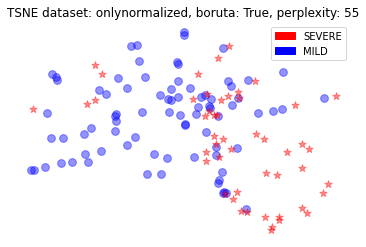

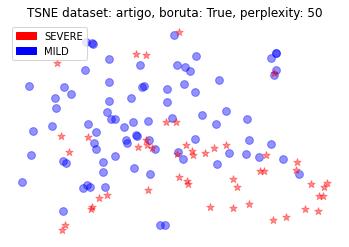

In [38]:
project_tsne('onlynormalized', boruta_features=True, perplexity=55)
project_tsne('artigo', boruta_features=True, perplexity=50)

plt.show()

e:\Apps\miniconda3\envs\py310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
e:\Apps\miniconda3\envs\py310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
e:\Apps\miniconda3\envs\py310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
e:\Apps\miniconda3\envs\py310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warning

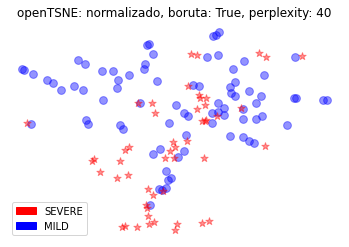

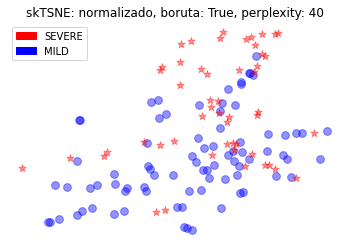

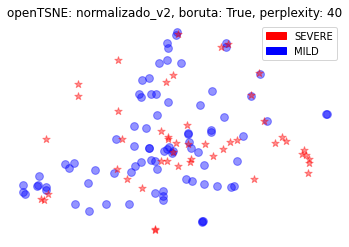

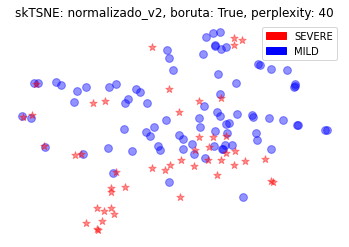

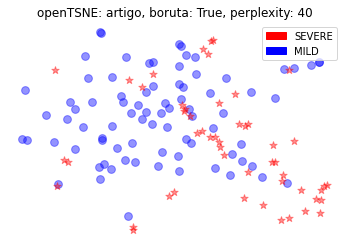

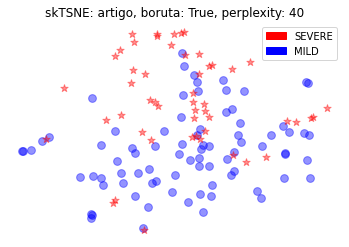

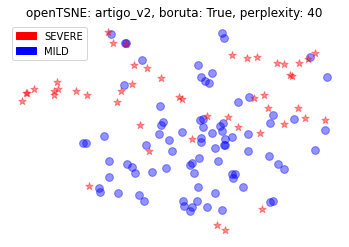

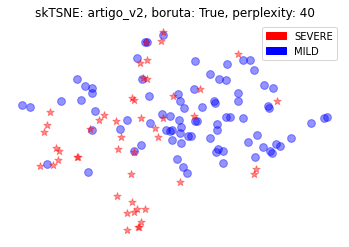

In [15]:
project_tsne('normalizado', boruta_features=True, perplexity=40)
project_tsne('normalizado',  engine='skTSNE', boruta_features=True, perplexity=40)

project_tsne('normalizado_v2', boruta_features=True, perplexity=40)
project_tsne('normalizado_v2', engine='skTSNE', boruta_features=True, perplexity=40)

project_tsne('artigo', boruta_features=True, perplexity=40)
project_tsne('artigo', engine='skTSNE', boruta_features=True, perplexity=40)

project_tsne('artigo_v2', boruta_features=True, perplexity=40)
project_tsne('artigo_v2', engine='skTSNE', boruta_features=True, perplexity=40)

plt.show()